<a href="https://colab.research.google.com/github/BxMild/bsc_dpdm24/blob/main/Chapter_5_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import data

In [112]:
import pandas as pd

In [113]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [114]:
apndx_data = pd.read_csv('/content/drive/MyDrive/Data_BSC_DPDM24/apndx.csv')
apndx_data

,Patient_ID,Country,Age,Gender,BMI,Smoking_Status,Alcohol_Consumption,Family_History_Cancer,Genetic_Mutations,Chronic_Diseases,...,Cholesterol_Level,White_Blood_Cell_Count,Red_Blood_Cell_Count,Platelet_Count,Tumor_Markers,Symptom_Severity,Diagnosis_Delay_Days,Treatment_Type,Survival_Years_After_Diagnosis,Appendix_Cancer_Prediction
0,PID_000001,China,67,Female,28.6,No,Low,Yes,No,Diabetes,...,228,8.1,4.4,361,Negative,Mild,691,Surgery,6.5,Yes
1,PID_000002,Saudi Arabia,83,Female,19.4,No,Low,No,No,Diabetes,...,186,9.7,6.2,235,Negative,Moderate,275,Chemotherapy,1.6,No
2,PID_000003,France,52,Female,17.2,No,Low,Yes,No,Diabetes,...,231,8.2,4.6,269,Negative,Moderate,668,Chemotherapy,0.7,No
3,PID_000004,Russia,71,Male,31.8,Yes,Low,No,No,NaN,...,151,6.8,6.0,193,Negative,Moderate,256,Radiation,2.1,No
4,PID_000005,USA,19,Female,17.7,No,Low,No,No,Hypertension,...,236,6.7,4.9,396,Negative,Mild,370,Radiation,0.5,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259995,PID_259996,USA,33,Male,22.3,No,Low,No,No,Diabetes,...,159,7.5,5.2,344,Negative,Moderate,67,Surgery,1.7,No
259996,PID_259997,Australia,45,Female,27.5,Yes,Moderate,Yes,No,Hypertension,...,268,8.0,5.0,195,Negative,Moderate,578,Radiation,0.4,Yes
259997,PID_259998,South Africa,76,Male,27.9,Yes,Moderate,No,No,NaN,...,156,7.8,5.5,201,Positive,Moderate,670,Chemotherapy,0.0,No
259998,PID_259999,China,68,Female,24.0,No,Low,No,No,NaN,...,226,7.9,5.1,386,Negative,Moderate,316,Radiation,8.1,No


In [115]:
apndx_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260000 entries, 0 to 259999
Data columns (total 25 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Patient_ID                      260000 non-null  object 
 1   Country                         260000 non-null  object 
 2   Age                             260000 non-null  int64  
 3   Gender                          260000 non-null  object 
 4   BMI                             260000 non-null  float64
 5   Smoking_Status                  260000 non-null  object 
 6   Alcohol_Consumption             260000 non-null  object 
 7   Family_History_Cancer           260000 non-null  object 
 8   Genetic_Mutations               260000 non-null  object 
 9   Chronic_Diseases                129913 non-null  object 
 10  Physical_Activity_Level         260000 non-null  object 
 11  Diet_Type                       260000 non-null  object 
 12  Radiation_Exposu

In [116]:
apndx_data['Chronic_Diseases'] = apndx_data['Chronic_Diseases'].fillna(value='No')
apndx_data

,Patient_ID,Country,Age,Gender,BMI,Smoking_Status,Alcohol_Consumption,Family_History_Cancer,Genetic_Mutations,Chronic_Diseases,...,Cholesterol_Level,White_Blood_Cell_Count,Red_Blood_Cell_Count,Platelet_Count,Tumor_Markers,Symptom_Severity,Diagnosis_Delay_Days,Treatment_Type,Survival_Years_After_Diagnosis,Appendix_Cancer_Prediction
0,PID_000001,China,67,Female,28.6,No,Low,Yes,No,Diabetes,...,228,8.1,4.4,361,Negative,Mild,691,Surgery,6.5,Yes
1,PID_000002,Saudi Arabia,83,Female,19.4,No,Low,No,No,Diabetes,...,186,9.7,6.2,235,Negative,Moderate,275,Chemotherapy,1.6,No
2,PID_000003,France,52,Female,17.2,No,Low,Yes,No,Diabetes,...,231,8.2,4.6,269,Negative,Moderate,668,Chemotherapy,0.7,No
3,PID_000004,Russia,71,Male,31.8,Yes,Low,No,No,No,...,151,6.8,6.0,193,Negative,Moderate,256,Radiation,2.1,No
4,PID_000005,USA,19,Female,17.7,No,Low,No,No,Hypertension,...,236,6.7,4.9,396,Negative,Mild,370,Radiation,0.5,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259995,PID_259996,USA,33,Male,22.3,No,Low,No,No,Diabetes,...,159,7.5,5.2,344,Negative,Moderate,67,Surgery,1.7,No
259996,PID_259997,Australia,45,Female,27.5,Yes,Moderate,Yes,No,Hypertension,...,268,8.0,5.0,195,Negative,Moderate,578,Radiation,0.4,Yes
259997,PID_259998,South Africa,76,Male,27.9,Yes,Moderate,No,No,No,...,156,7.8,5.5,201,Positive,Moderate,670,Chemotherapy,0.0,No
259998,PID_259999,China,68,Female,24.0,No,Low,No,No,No,...,226,7.9,5.1,386,Negative,Moderate,316,Radiation,8.1,No


In [117]:
apndx_data['Treatment_Type'] = apndx_data['Treatment_Type'].fillna(value='No')
apndx_data

,Patient_ID,Country,Age,Gender,BMI,Smoking_Status,Alcohol_Consumption,Family_History_Cancer,Genetic_Mutations,Chronic_Diseases,...,Cholesterol_Level,White_Blood_Cell_Count,Red_Blood_Cell_Count,Platelet_Count,Tumor_Markers,Symptom_Severity,Diagnosis_Delay_Days,Treatment_Type,Survival_Years_After_Diagnosis,Appendix_Cancer_Prediction
0,PID_000001,China,67,Female,28.6,No,Low,Yes,No,Diabetes,...,228,8.1,4.4,361,Negative,Mild,691,Surgery,6.5,Yes
1,PID_000002,Saudi Arabia,83,Female,19.4,No,Low,No,No,Diabetes,...,186,9.7,6.2,235,Negative,Moderate,275,Chemotherapy,1.6,No
2,PID_000003,France,52,Female,17.2,No,Low,Yes,No,Diabetes,...,231,8.2,4.6,269,Negative,Moderate,668,Chemotherapy,0.7,No
3,PID_000004,Russia,71,Male,31.8,Yes,Low,No,No,No,...,151,6.8,6.0,193,Negative,Moderate,256,Radiation,2.1,No
4,PID_000005,USA,19,Female,17.7,No,Low,No,No,Hypertension,...,236,6.7,4.9,396,Negative,Mild,370,Radiation,0.5,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259995,PID_259996,USA,33,Male,22.3,No,Low,No,No,Diabetes,...,159,7.5,5.2,344,Negative,Moderate,67,Surgery,1.7,No
259996,PID_259997,Australia,45,Female,27.5,Yes,Moderate,Yes,No,Hypertension,...,268,8.0,5.0,195,Negative,Moderate,578,Radiation,0.4,Yes
259997,PID_259998,South Africa,76,Male,27.9,Yes,Moderate,No,No,No,...,156,7.8,5.5,201,Positive,Moderate,670,Chemotherapy,0.0,No
259998,PID_259999,China,68,Female,24.0,No,Low,No,No,No,...,226,7.9,5.1,386,Negative,Moderate,316,Radiation,8.1,No


In [118]:
apndx_data.groupby(['Symptom_Severity','Appendix_Cancer_Prediction']).count()

Patient_ID  Country     Age  \
Symptom_Severity Appendix_Cancer_Prediction                                
Mild             No                              110229   110229  110229   
                 Yes                              19532    19532   19532   
Moderate         No                               77436    77436   77436   
                 Yes                              13761    13761   13761   
Severe           No                               33048    33048   33048   
                 Yes                               5994     5994    5994   

                                             Gender     BMI  Smoking_Status  \
Symptom_Severity Appendix_Cancer_Prediction                                   
Mild             No                          110229  110229          110229   
                 Yes                          19532   19532           19532   
Moderate         No                           77436   77436           77436   
                 Yes                          13761   13761           13761   
Severe           No                           33048   33048           33048   
                 Yes                           5994    5994            5994   

                                             Alcohol_Consumption  \
Symptom_Severity Appendix_Cancer_Prediction                        
Mild             No                                       110229   
                 Yes                                       19532   
Moderate         No                                        77436   
                 Yes                                       13761   
Severe           No                                        33048   
                 Yes                                        5994   

                                             Family_History_Cancer  \
Symptom_Severity Appendix_Cancer_Prediction                          
Mild             No                                         110229   
                 Yes                                         19532   
Moderate         No                                          77436   
                 Yes                                         13761   
Severe           No                                          33048   
                 Yes                                          5994   

                                             Genetic_Mutations  \
Symptom_Severity Appendix_Cancer_Prediction                      
Mild             No                                     110229   
                 Yes                                     19532   
Moderate         No                                      77436   
                 Yes                                     13761   
Severe           No                                      33048   
                 Yes                                      5994   

                                             Chronic_Diseases  ...  \
Symptom_Severity Appendix_Cancer_Prediction                    ...   
Mild             No                                    110229  ...   
                 Yes                                    19532  ...   
Moderate         No                                     77436  ...   
                 Yes                                    13761  ...   
Severe           No                                     33048  ...   
                 Yes                                     5994  ...   

                                             Previous_Cancers  Blood_Pressure  \
Symptom_Severity Appendix_Cancer_Prediction                                     
Mild             No                                    110229          110229   
                 Yes                                    19532           19532   
Moderate         No                                     77436           77436   
                 Yes                                    13761           13761   
Severe           No                                     33048           33048   
                 Yes                    

## ลบข้อมูลหลังจากที่รู้ว่าเป็นหรือไม่เป็นมะเร็งแล้ว

In [119]:
# prompt: drop columns Diagnosis_Delay_Days Treatment_Type Survival_Years_After_Diagosis

# Correct the typo in 'Survival_Years_After_Diagosis' to 'Survival_Years_After_Diagnosis'
apndx_data = apndx_data.drop(columns=['Diagnosis_Delay_Days', 'Treatment_Type', 'Survival_Years_After_Diagnosis'])
apndx_data.head()

,Patient_ID,Country,Age,Gender,BMI,Smoking_Status,Alcohol_Consumption,Family_History_Cancer,Genetic_Mutations,Chronic_Diseases,...,Radiation_Exposure,Previous_Cancers,Blood_Pressure,Cholesterol_Level,White_Blood_Cell_Count,Red_Blood_Cell_Count,Platelet_Count,Tumor_Markers,Symptom_Severity,Appendix_Cancer_Prediction
0,PID_000001,China,67,Female,28.6,No,Low,Yes,No,Diabetes,...,No,No,156,228,8.1,4.4,361,Negative,Mild,Yes
1,PID_000002,Saudi Arabia,83,Female,19.4,No,Low,No,No,Diabetes,...,No,No,117,186,9.7,6.2,235,Negative,Moderate,No
2,PID_000003,France,52,Female,17.2,No,Low,Yes,No,Diabetes,...,No,No,115,231,8.2,4.6,269,Negative,Moderate,No
3,PID_000004,Russia,71,Male,31.8,Yes,Low,No,No,No,...,No,Yes,149,151,6.8,6.0,193,Negative,Moderate,No
4,PID_000005,USA,19,Female,17.7,No,Low,No,No,Hypertension,...,No,No,179,236,6.7,4.9,396,Negative,Mild,No


## ลบข้อมูลที่ไม่น่าจะใช้สร้าง model ได้

In [120]:
apndx_data = apndx_data.drop(columns=['Patient_ID', 'Country'])

In [121]:
apndx_data.shape

(260000, 20)

## แปลง data ให้เป็นตัวเลข

In [122]:
apndx_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260000 entries, 0 to 259999
Data columns (total 20 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Age                         260000 non-null  int64  
 1   Gender                      260000 non-null  object 
 2   BMI                         260000 non-null  float64
 3   Smoking_Status              260000 non-null  object 
 4   Alcohol_Consumption         260000 non-null  object 
 5   Family_History_Cancer       260000 non-null  object 
 6   Genetic_Mutations           260000 non-null  object 
 7   Chronic_Diseases            260000 non-null  object 
 8   Physical_Activity_Level     260000 non-null  object 
 9   Diet_Type                   260000 non-null  object 
 10  Radiation_Exposure          260000 non-null  object 
 11  Previous_Cancers            260000 non-null  object 
 12  Blood_Pressure              260000 non-null  int64  
 13  Cholesterol_Le

In [123]:

apndx_data['Symptom_Severity'] = apndx_data['Symptom_Severity'].map({'Mild': 1, 'Moderate': 2, 'Severe': 3})

apndx_data['Chronic_Diseases'] = apndx_data['Chronic_Diseases'].map({'No': 0, 'Yes': 1})

apndx_data['Appendix_Cancer_Prediction'] = apndx_data['Appendix_Cancer_Prediction'].map({'No': 0, 'Yes': 1})

apndx_data['Gender'] = apndx_data['Gender'].map({'Female': 0, 'Male': 1, 'Other': 2})

apndx_data['Smoking_Status'] = apndx_data['Smoking_Status'].map({'No': 0, 'Yes': 1})

apndx_data['Alcohol_Consumption'] = apndx_data['Alcohol_Consumption'].map({'Low': 0, 'Moderate': 1, 'High': 2})

apndx_data['Family_History_Cancer'] = apndx_data['Family_History_Cancer'].map({'No': 0, 'Yes': 1})

apndx_data['Physical_Activity_Level'] = apndx_data['Physical_Activity_Level'].map({'Low': 0, 'Moderate': 1, 'High': 2})

apndx_data['Radiation_Exposure'] = apndx_data['Radiation_Exposure'].map({'No': 0, 'Yes': 1})

apndx_data['Previous_Cancers'] = apndx_data['Previous_Cancers'].map({'No': 0, 'Yes': 1})

apndx_data['Tumor_Markers'] = apndx_data['Tumor_Markers'].map({'Negative': 0, 'Positive': 1})


In [145]:
apndx_data['Genetic_Mutations'] = apndx_data['Genetic_Mutations'].map({'No': 0, 'Yes': 1})

In [140]:
apndx_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260000 entries, 0 to 259999
Data columns (total 25 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Age                         260000 non-null  int64  
 1   BMI                         260000 non-null  float64
 2   Smoking_Status              260000 non-null  int64  
 3   Alcohol_Consumption         260000 non-null  int64  
 4   Family_History_Cancer       260000 non-null  int64  
 5   Genetic_Mutations           260000 non-null  object 
 6   Physical_Activity_Level     260000 non-null  int64  
 7   Radiation_Exposure          260000 non-null  int64  
 8   Previous_Cancers            260000 non-null  int64  
 9   Blood_Pressure              260000 non-null  int64  
 10  Cholesterol_Level           260000 non-null  int64  
 11  White_Blood_Cell_Count      260000 non-null  float64
 12  Red_Blood_Cell_Count        260000 non-null  float64
 13  Platelet_Count

In [146]:
apndx_data.head()

,Age,BMI,Smoking_Status,Alcohol_Consumption,Family_History_Cancer,Genetic_Mutations,Physical_Activity_Level,Radiation_Exposure,Previous_Cancers,Blood_Pressure,...,Symptom_Severity,Appendix_Cancer_Prediction,Chronic_Diseases_0.0,Chronic_Diseases_nan,Gender_0,Gender_1,Gender_2,Diet_Type_Non-Vegetarian,Diet_Type_Vegan,Diet_Type_Vegetarian
0,67,28.6,0,0,1,0,2,0,0,156,...,1,1,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1,83,19.4,0,0,0,0,0,0,0,117,...,2,0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
2,52,17.2,0,0,1,0,0,0,0,115,...,2,0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
3,71,31.8,1,0,0,0,2,0,1,149,...,2,0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,19,17.7,0,0,0,0,1,0,0,179,...,1,0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


In [126]:
# prompt: tranform Chronic_Diseases Gender Diet_Type using one-hot-encoder

import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Assuming apndx_data is your DataFrame
# Create the OneHotEncoder object
enc = OneHotEncoder(handle_unknown='ignore')

# Fit the encoder on the specified columns
enc.fit(apndx_data[['Chronic_Diseases', 'Gender', 'Diet_Type']])

# Transform the data
onehotlabels = enc.transform(apndx_data[['Chronic_Diseases', 'Gender', 'Diet_Type']]).toarray()

# Create a new DataFrame from the one-hot encoded data
onehot_df = pd.DataFrame(onehotlabels, columns=enc.get_feature_names_out(['Chronic_Diseases', 'Gender', 'Diet_Type']))

# Concatenate the one-hot encoded DataFrame with the original DataFrame
apndx_data = pd.concat([apndx_data, onehot_df], axis=1)

# Drop the original columns
apndx_data = apndx_data.drop(['Chronic_Diseases', 'Gender', 'Diet_Type'], axis=1)

# Display the updated DataFrame
apndx_data.head()


,Age,BMI,Smoking_Status,Alcohol_Consumption,Family_History_Cancer,Genetic_Mutations,Physical_Activity_Level,Radiation_Exposure,Previous_Cancers,Blood_Pressure,...,Symptom_Severity,Appendix_Cancer_Prediction,Chronic_Diseases_0.0,Chronic_Diseases_nan,Gender_0,Gender_1,Gender_2,Diet_Type_Non-Vegetarian,Diet_Type_Vegan,Diet_Type_Vegetarian
0,67,28.6,0,0,1,No,2,0,0,156,...,1,1,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1,83,19.4,0,0,0,No,0,0,0,117,...,2,0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
2,52,17.2,0,0,1,No,0,0,0,115,...,2,0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
3,71,31.8,1,0,0,No,2,0,1,149,...,2,0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,19,17.7,0,0,0,No,1,0,0,179,...,1,0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


In [143]:
apndx_data['Appendix_Cancer_Prediction'] = apndx_data['Appendix_Cancer_Prediction'].map({'No': 0, 'Yes' : 1})

# เก็บ Test เอาไว้วัดผลตอนจบ

In [147]:
# prompt: random sampling 60000 data and also keep the rest

# Assuming 'apndx_data' DataFrame is already loaded as in the previous code.

import pandas as pd
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
train_data, test_data = train_test_split(apndx_data, train_size=200000, random_state=8)

# Now you have two separate DataFrames:
#   - train_data: Contains 60000 randomly sampled rows
#   - test_data: Contains the remaining rows


# Example usage
print(f"Training data shape: {train_data.shape}")
print(f"Testing data shape: {test_data.shape}")


Training data shape: (200000, 25)
Testing data shape: (60000, 25)


In [148]:
train_data.groupby(['Appendix_Cancer_Prediction']).count()

,Age,BMI,Smoking_Status,Alcohol_Consumption,Family_History_Cancer,Genetic_Mutations,Physical_Activity_Level,Radiation_Exposure,Previous_Cancers,Blood_Pressure,...,Tumor_Markers,Symptom_Severity,Chronic_Diseases_0.0,Chronic_Diseases_nan,Gender_0,Gender_1,Gender_2,Diet_Type_Non-Vegetarian,Diet_Type_Vegan,Diet_Type_Vegetarian
Appendix_Cancer_Prediction,,,,,,,,,,,,,,,,,,,,,
0,169804,169804,169804,169804,169804,169804,169804,169804,169804,169804,...,169804,169804,169804,169804,169804,169804,169804,169804,169804,169804
1,30196,30196,30196,30196,30196,30196,30196,30196,30196,30196,...,30196,30196,30196,30196,30196,30196,30196,30196,30196,30196


In [149]:
test_data.groupby(['Appendix_Cancer_Prediction']).count()

,Age,BMI,Smoking_Status,Alcohol_Consumption,Family_History_Cancer,Genetic_Mutations,Physical_Activity_Level,Radiation_Exposure,Previous_Cancers,Blood_Pressure,...,Tumor_Markers,Symptom_Severity,Chronic_Diseases_0.0,Chronic_Diseases_nan,Gender_0,Gender_1,Gender_2,Diet_Type_Non-Vegetarian,Diet_Type_Vegan,Diet_Type_Vegetarian
Appendix_Cancer_Prediction,,,,,,,,,,,,,,,,,,,,,
0,50909,50909,50909,50909,50909,50909,50909,50909,50909,50909,...,50909,50909,50909,50909,50909,50909,50909,50909,50909,50909
1,9091,9091,9091,9091,9091,9091,9091,9091,9091,9091,...,9091,9091,9091,9091,9091,9091,9091,9091,9091,9091


# เลือก Model ที่ดีที่สุด (Model Selection)



1.   Dedition Tree
2.   Short Dicition Tree
3.   Naive Bayes



## แบ่งข้อมูลเป็น 10 ก้อน Split data into 10 flods

In [150]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10, shuffle=True, random_state=42)

In [151]:
X_train = train_data.drop(columns=['Appendix_Cancer_Prediction'], axis=1)
y_train = train_data['Appendix_Cancer_Prediction']

## Dicition Tree

In [152]:
# import
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
# define
dt_classifier = DecisionTreeClassifier() #default
# train
# evaleation
cv_scores = cross_val_score(dt_classifier, X_train, y_train, cv=kf, scoring='accuracy')

In [153]:
# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())
print("Standard Deviation:", cv_scores.std())

Cross-Validation Scores: [0.72525 0.7261  0.7259  0.7287  0.72245 0.7257  0.72325 0.72495 0.7265
 0.7199 ]
Mean Accuracy: 0.7248699999999999
Standard Deviation: 0.002322089576222249


## (Shot) Dicition tree

In [154]:
# import
from sklearn.tree import DecisionTreeClassifier
# define
df_classifier2 = DecisionTreeClassifier(max_depth=5) #default
# train
# evaleation
cv_scores2 = cross_val_score(df_classifier2, X_train, y_train, cv=kf, scoring='accuracy')

In [155]:
# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores2)
print("Mean Accuracy:", cv_scores2.mean())
print("Standard Deviation:", cv_scores2.std())

Cross-Validation Scores: [0.8508  0.85025 0.8461  0.85075 0.8452  0.85    0.84845 0.8504  0.84895
 0.8485 ]
Mean Accuracy: 0.84894
Standard Deviation: 0.0018491619723539766


## Naive Bayes

In [156]:
# import
from sklearn.naive_bayes import GaussianNB
# define
nb_classifier = GaussianNB()
# train
# evaleation
cv_scores3 = cross_val_score(nb_classifier, X_train, y_train, cv=kf, scoring='accuracy')

In [157]:
# print the cross-validation scores
print("Cross-Validation Scores:", cv_scores3)
print("Mean Accuracy:", cv_scores3.mean())
print("Standard Deviation:", cv_scores3.std())

Cross-Validation Scores: [0.85085 0.8408  0.84615 0.83905 0.83235 0.8355  0.83365 0.8367  0.849
 0.8482 ]
Mean Accuracy: 0.841225
Standard Deviation: 0.006483103037897808


# เลือก Model ที่แม่นที่สุด ตือ (shot) Tree ม่า Train ด้วย all training data

In [158]:
# import
from sklearn.tree import DecisionTreeClassifier
# define
df_classifier2 = DecisionTreeClassifier(max_depth=5)
# train
df_classifier2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

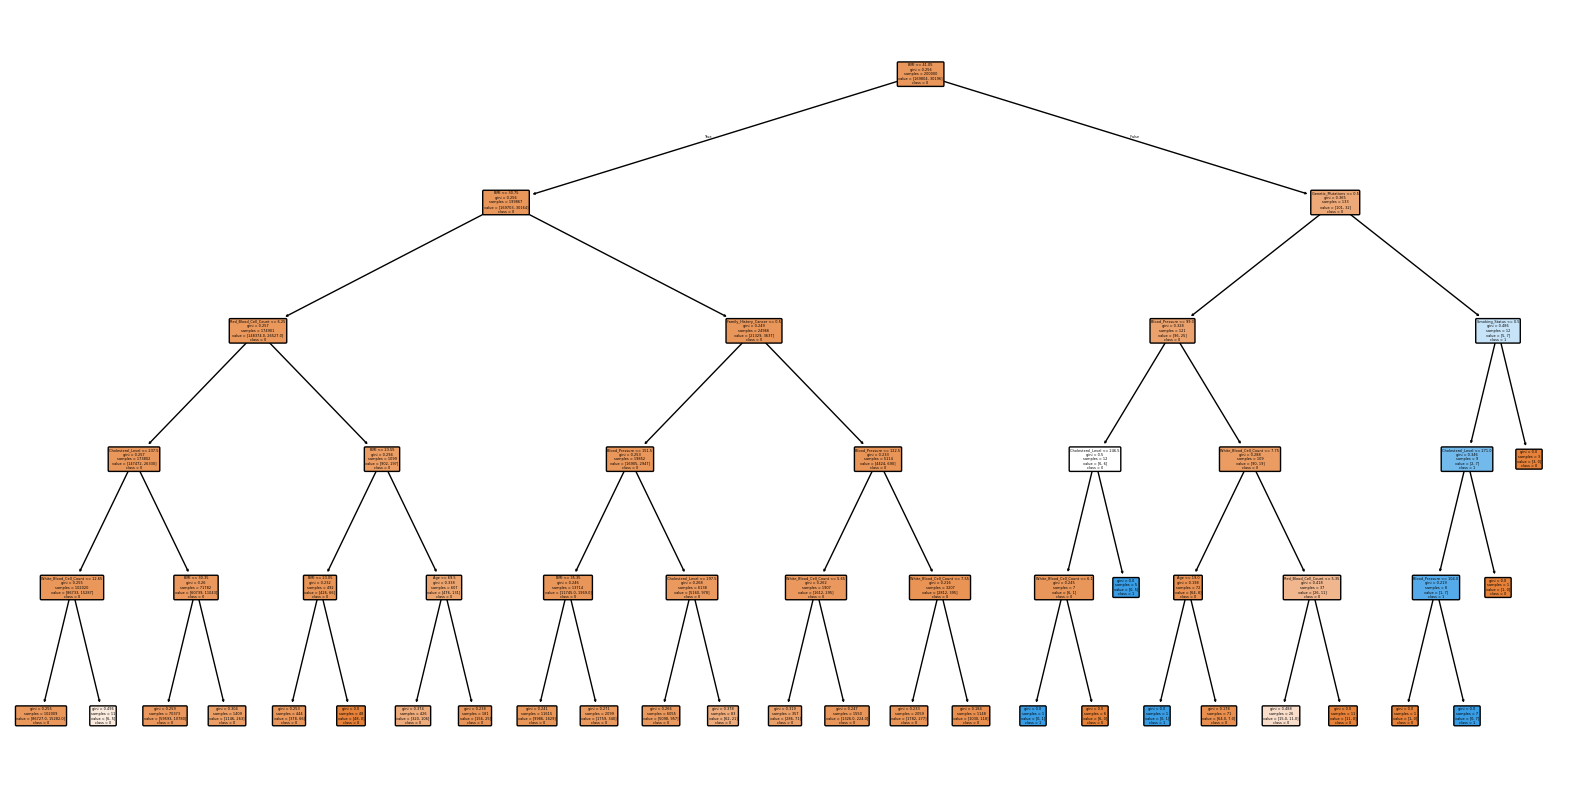

In [162]:
# prompt: shoe the tained tree

import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(20,10))
tree.plot_tree(df_classifier2,filled=True, feature_names=X_train.columns, class_names=['0', '1'], rounded=True)
plt.show()


# วัดผลด้วน test data

In [163]:
X_test = test_data.drop(columns=['Appendix_Cancer_Prediction'], axis=1)
y_test = test_data['Appendix_Cancer_Prediction']

In [166]:
#predict
y_pred = df_classifier2.predict(X_test)

In [167]:
#evaluate
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on test data:, {accuracy}")

Accuracy on test data:, 0.8484666666666667


# Q12 หาต้นไม้ตัดสันใจที่มี average cross-validation accuracy มากกว่า 84.89%

In [170]:
# import
from sklearn.tree import DecisionTreeClassifier
# define
df_classifier4 = DecisionTreeClassifier(max_depth=3) #default
# train
# evaleation
cv_scores4 = cross_val_score(df_classifier4, X_train, y_train, cv=kf, scoring='accuracy')
# print the cross-validation scores
print("Cross-Validation Scores:", cv_scores4)
print("Mean Accuracy:", cv_scores4.mean())
print("Standard Deviation:", cv_scores4.std())

Cross-Validation Scores: [0.85075 0.85025 0.8461  0.85075 0.84535 0.85005 0.84845 0.8504  0.84895
 0.8485 ]
Mean Accuracy: 0.8489550000000001
Standard Deviation: 0.0018170649410519095


In [172]:
df_classifier4.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

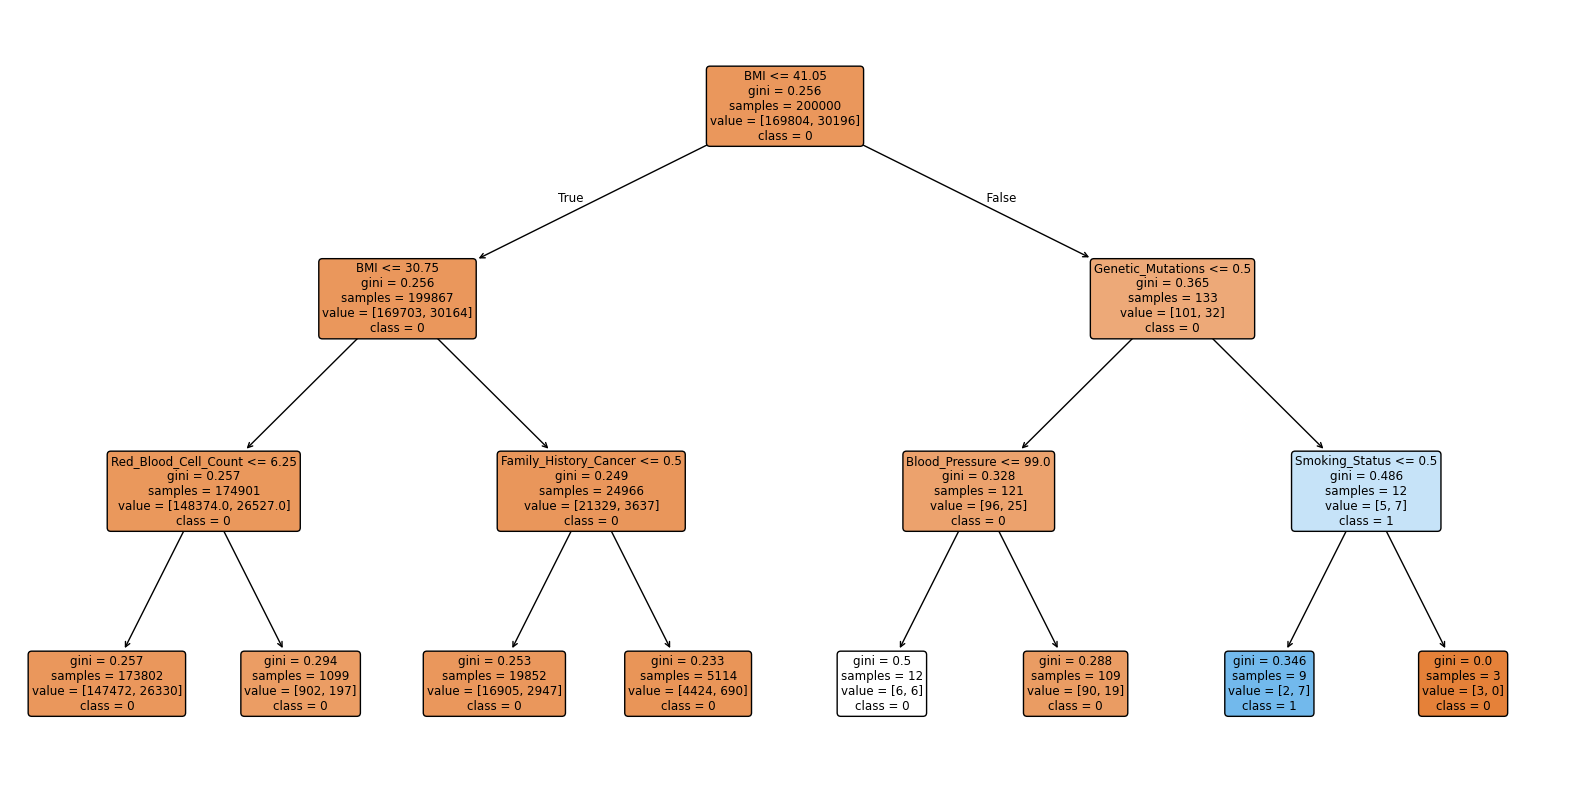

In [174]:
# prompt: shoe the tained tree

import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(20,10))
tree.plot_tree(df_classifier4,filled=True, feature_names=X_train.columns, class_names=['0', '1'], rounded=True)
plt.show()